<div align="center">
  <h1><b> Quantum Information </b></h1>
  <h2> Bell Measurement and Applications </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [Definition](#definition)
- [Qiskit Implementation](#qiskit-implementation)
    -  Bell States
    -  Bell Measurement
    -  Bell measurement on $|\phi^+ \rangle$
    -  Bell measurement on $|\phi^- \rangle$
    -  Bell measurement on $|\psi^+ \rangle$
    -  Bell measurement on $|\psi^- \rangle$
- [Applications](#applications)
    - Entanglement Swapping
    - Quantum Teleportation
    - Superdense Coding

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [1]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit_aer import Aer


# Definition

A Bell measurement is a joint measurement on two qubits in the Bell basis. It identifies which Bell state the two-qubit system is in and is essential for protocols such as entanglement swapping, quantum teleportation, and superdense coding.

The Bell basis is represented by the following set of state vectors:

$$|B_{00}\rangle := |\phi^+ \rangle := \frac{1}{\sqrt 2}(|00\rangle + |11\rangle),$$
$$|B_{01}\rangle := |\psi^+ \rangle := \frac{1}{\sqrt 2}(|01\rangle + |10\rangle),$$
$$|B_{10}\rangle := |\phi^- \rangle := \frac{1}{\sqrt 2}(|00\rangle - |11\rangle),$$
$$|B_{11}\rangle := |\psi^- \rangle := \frac{1}{\sqrt 2}(|01\rangle - |10\rangle).$$

The relantionship between the computational basis and the Bell basis can be expressed as:

\begin{align}
|B_{jk}\rangle &= C_X^{01} (H \otimes I) |jk\rangle,\\
|jk\rangle &= (H \otimes I) C_X^{01} |B_{jk}\rangle,
\end{align}

where $j,k = 0,1$.

- If one of the qubits comes from a Bell pair, then a Bell measurement projects the two-qubit system in one of the four Bell states.

- A Bell measurement applied to a Bell (entangled) state will output one of the four classical outcomes:
  
$$|\phi^+ \rangle \rightarrow 00.$$
$$|\phi^- \rangle \rightarrow 01.$$
$$|\psi^+ \rangle \rightarrow 10.$$
$$|\psi^- \rangle \rightarrow 11.$$

# Qiskit Implementation

## Bell States

$$|\phi^+\rangle_{AB} := \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |0\rangle_{B} + |1\rangle_{A} \otimes |1\rangle_{B} \bigg) := \frac{1}{\sqrt 2}(|00\rangle_{AB} + |11\rangle_{AB}).$$

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


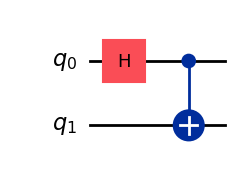

In [ ]:
# State |phi+>

def PhiPlus():
    qc = QuantumCircuit(2)                   # Creating the quantum circuit object.
    qc.h(0), qc.cx(0,1)                      # Adding quantum gates to the circuit.
    print(Statevector.from_instruction(qc))
    return qc

phi_plus = PhiPlus()
phi_plus.draw('mpl')

$$|\phi^+\rangle_{AB} := \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |0\rangle_{B} - |1\rangle_{A} \otimes |1\rangle_{B} \bigg) := \frac{1}{\sqrt 2}(|00\rangle_{AB} - |11\rangle_{AB}).$$

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


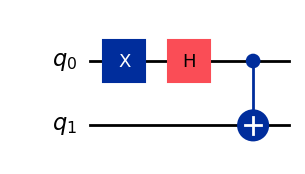

In [ ]:
# State |phi->

def PhiMinus():
    qc = QuantumCircuit(2) 
    qc.x(0), qc.h(0), qc.cx(0,1) 
    print(Statevector.from_instruction(qc))
    return qc

phi_minus = PhiMinus()
phi_minus.draw('mpl')

$$|\psi^+\rangle_{AB} := \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |1\rangle_{B} + |1\rangle_{A} \otimes |0\rangle_{B} \bigg) := \frac{1}{\sqrt 2}(|01\rangle_{AB} + |10\rangle_{AB}).$$

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


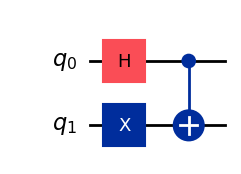

In [ ]:
# State |psi+>

def PsiPlus():
    qc = QuantumCircuit(2) 
    qc.h(0), qc.x(1), qc.cx(0,1) 
    print(Statevector.from_instruction(qc))
    return qc

psi_plus = PsiPlus()
psi_plus.draw('mpl')

$$|\psi^-\rangle_{AB} := \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |1\rangle_{B} - |1\rangle_{A} \otimes |0\rangle_{B} \bigg) := \frac{1}{\sqrt 2}(|01\rangle_{AB} - |10\rangle_{AB}).$$

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


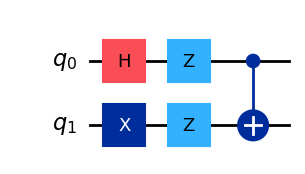

In [ ]:
# State |psi->

def PsiMinus():
    qc = QuantumCircuit(2) 
    qc.h(0), qc.x(1), qc.z(1), qc.z(0), qc.cx(0,1) 
    #qc.x([0,1]); qc.h(0); qc.cx(0,1) # prepara |Psi->
    print(Statevector.from_instruction(qc))
    return qc

psi_minus = PsiMinus()
psi_minus.draw('mpl')

## Bell Measurement

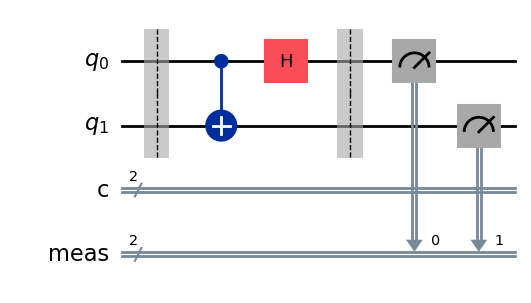

In [ ]:
# Defining the Bell measurement:

def BellMeasurement(qc):
    qc.barrier()
    qc.cx(0,1), qc.h(0)
    qc.measure_all() # Measuring all qubits. A quantum computer always measures in the computational basis a.k.a Z basis.
    return qc 

qc = QuantumCircuit(2,2)
BellMeasurement(qc).draw('mpl')

In [7]:
# Utility function:

def GetCounts(qc):
    backend = Aer.get_backend('qasm_simulator') # Define the Backend for the simulator.
    job = backend.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Measurement results:", counts)                             
    return counts

## Bell measurement on $|\phi^+ \rangle$:

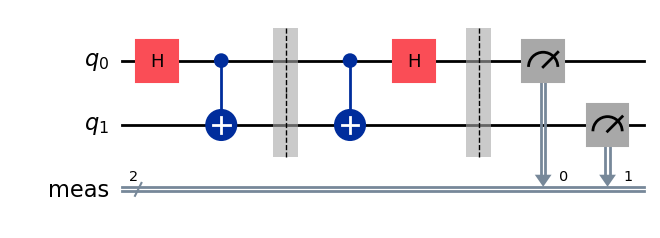

In [8]:
qc = BellMeasurement(phi_plus)
qc.draw('mpl')

Measurement results: {'00': 1024}


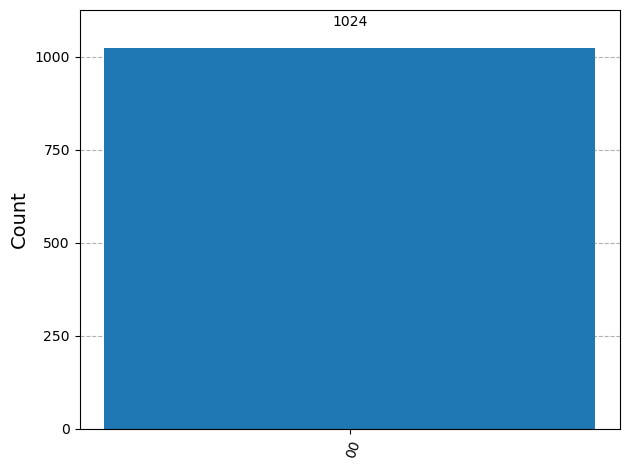

In [9]:
counts = GetCounts(qc)
plot_histogram(counts)

## Bell measurement on $|\phi^- \rangle$:

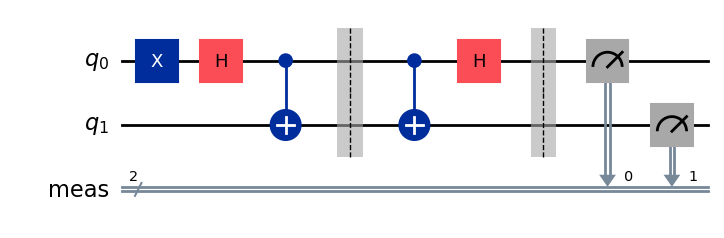

In [10]:
qc = BellMeasurement(phi_minus)
qc.draw('mpl')

Measurement results: {'01': 1024}


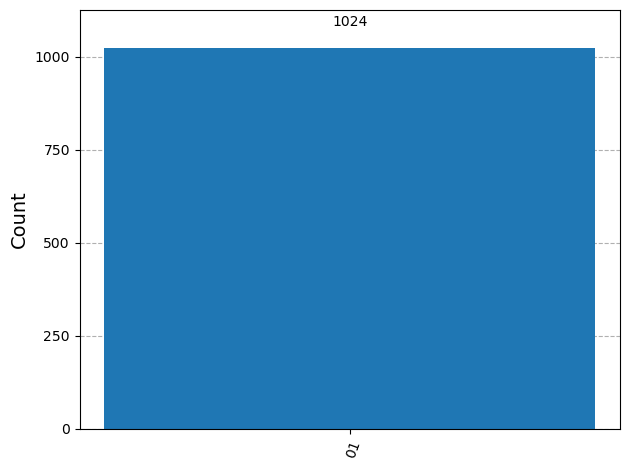

In [11]:
counts = GetCounts(qc)
plot_histogram(counts)

## Bell measurement on $|\psi^+ \rangle$:

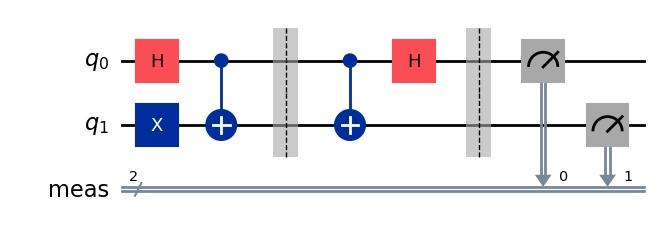

In [12]:
qc = BellMeasurement(psi_plus)
qc.draw('mpl')

Measurement results: {'10': 1024}


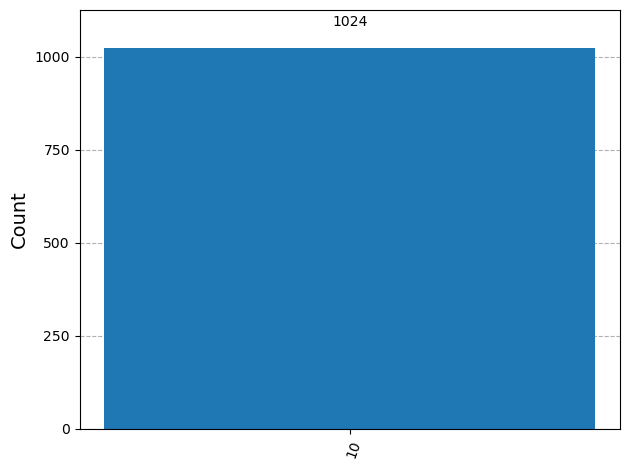

In [13]:
counts = GetCounts(qc)
plot_histogram(counts)

## Bell measurement on $|\psi^- \rangle$:

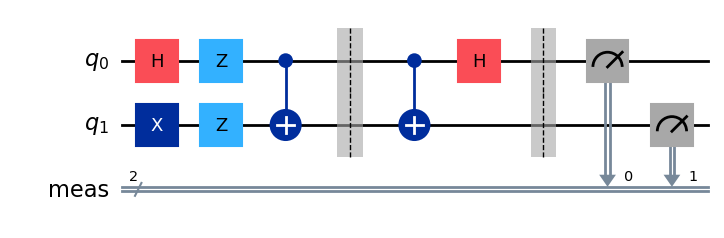

In [14]:
qc = BellMeasurement(psi_minus)
qc.draw('mpl')

Measurement results: {'11': 1024}


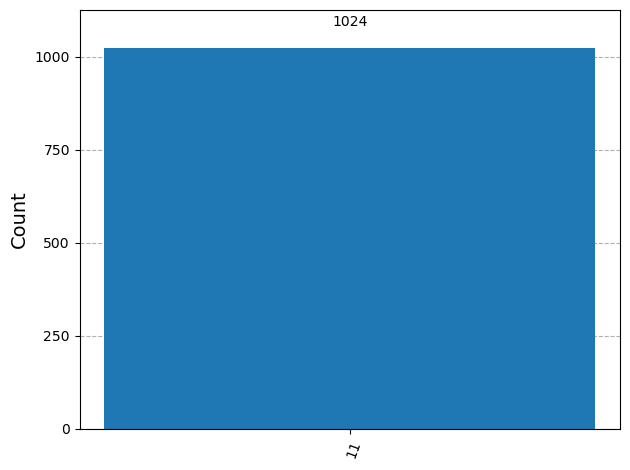

In [15]:
counts = GetCounts(qc)
plot_histogram(counts)

# Applications

1. Entanglement swapping: 
    - A Bell measurement can be used to redistribute or swap entanglement.
    - Consider two entangled pairs: (A–B) and (C–D). A Bell measurement on B and C projects A and D into an entangled state even though they have never interacted.

2. Quantum Teleportation:
    - Alice uses a Bell measurement to convert quantum information into two classical bits, then transmits them to Bob, who uses to reconstruct the unknown quantum state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ Alice wants to teleport.
    - Alice and Bob share an Bell pair of entangled qubits ($q_1$, $q_2$). Alice jointly measures the unknown qubit ($q_0$) and her entangled qubit ($q_1$) in the Bell basis (Bell measurement), projecting them into one of four Bell states while destroying the original entanglement between $q_1$ and $q_2$. The act of measurement collapses the Bell state into the classical information that Bob needs to apply the correct unitary operations {$\mathbb{I}_d, X, Z, ZX$} on his qubit to recover the teleported quantum state $|\psi\rangle$. 




3. Superdense Coding: 
    - A Bell measurement is used to determine the state of an entangled qubit pair and decode the two classical bits Alice wants to send. 
    - Alice and Bob share a Bell pair of entangled qubits ($q_1$, $q_2$). To send two classical bits, Alice applies one of four unitary operations {$\mathbb{I}_d, X, Z, XZ$} to her qubit $q_1$ and sends it to Bob. Bob performs a Bell-state measurement on both qubits ($q_1$ and $q_2$) to determine which Bell state the pair is in, thereby decoding Alice's two-bit message.

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed.